The goal of this notebook is to calculate the boltzmann distribution, f(p_x,p_z,x,z) of our pointwise data. This assumes our data is in statistical steady state.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
#importing point data:

image_numbers = np.arange(0,4000,1)
u_max_sofar = 0
v_max_sofar = 0
x_max_sofar = 0
z_max_sofar = 0

for image_number_orig in image_numbers:
    point_data = np.loadtxt('/home/bay22/github_repos/RIMSAR/data/03_processed/point_data/point_data_'+str          (image_number_orig)+'.dat')
    #density of borosilicate glass: 2.23 g/cm3
    #volume of 0.6cm radius glass sphere = 0.90 cm^3
    #mass = 0.002 kg
    mass = 0.002
    point_data *= 12/(29.4*1000)
    point_data[:,1] = 0.4-point_data[:,1]
    point_data[:,3:] *= 300

    #finding max and mins
    x_max_data = np.amax(np.abs(point_data[:,0]))
    x_max_sofar = max(x_max_data,x_max_sofar)
    z_max_data = np.amax(np.abs(point_data[:,1]))
    z_max_sofar = max(z_max_data,z_max_sofar)
    u_max_data = np.amax(np.abs(point_data[:,3]))
    u_max_sofar = max(u_max_data,u_max_sofar)
    v_max_data = np.amax(np.abs(point_data[:,4]))
    v_max_sofar = max(v_max_data,v_max_sofar)
    
print(x_max_sofar)
print(z_max_sofar)





0.39612244897959187
0.2944897959183674


In [3]:
#generating data bins:
du = 0.1225
u_min = du*5
u_range = du*5
v_range = du*5
x_range = 0.4
z_range = 0.4
u_bin = np.arange(-u_range,u_range,du)
v_bin = np.arange(-v_range,v_range,du)
x_bin = np.arange(-x_range,x_range,0.01)
z_bin = np.arange(-z_range,z_range,0.01)

#sizes:
uN = u_bin.shape[0]
vN = v_bin.shape[0]
xN = x_bin.shape[0]
zN = z_bin.shape[0]

#building bin
bin = np.zeros((uN,vN,xN,zN),dtype = np.int)
#checking size is feasible
print("The bin matrix is %d MB" % (bin.size * bin.itemsize/1000000))


The bin matrix is 6 MB


In [4]:
N = 0 #number of measurements

for image_number_orig in image_numbers:
    point_data = np.loadtxt('/home/bay22/github_repos/RIMSAR/data/03_processed/point_data/point_data_'+str          (image_number_orig)+'.dat')
    #density of borosilicate glass: 2.23 g/cm3
    #volume of 0.6cm radius glass sphere = 0.90 cm^3
    #mass = 0.002 kg
    mass = 0.002
    point_data *= 12/(29.4*1000)
    point_data[:,1] = 0.4-point_data[:,1]
    point_data[:,3:] *= 300

    n_data_points = point_data.shape[0] #number of data points within each frame
    #N += n_data_points
    for i in range(0,n_data_points):
        x_i = int(np.floor(xN*(point_data[i,0]+x_range)/(2*x_range)))
        z_i = int(np.floor(zN*(point_data[i,1]+z_range)/(2*z_range)))
        u_i = int(np.floor(uN*(point_data[i,3]+u_range)/(2*u_range)))
        v_i = int(np.floor(vN*(point_data[i,4]+v_range)/(2*v_range)))

        if (x_i >0) and (x_i < xN):
            if (z_i >0) and (z_i < zN):
                if (u_i >0) and (u_i < uN):
                    if (v_i >0) and (v_i < vN):

                        bin[u_i,v_i,x_i,z_i] += 1
                        N += 1




(11, 11)


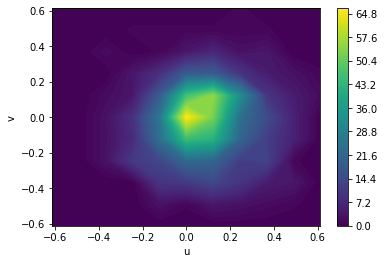

In [5]:
print(bin[:,:,50,50].shape)
nx = 50
nz = 50
plt.contourf(u_bin,v_bin,bin[:,:,nx,nz],levels=100)
plt.xlabel('u')
plt.ylabel('v')
plt.colorbar()
 

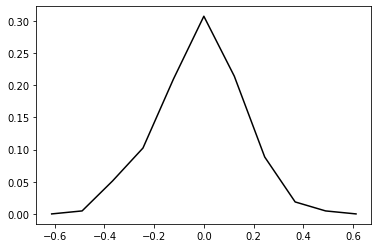

In [6]:
plt.plot(u_bin,bin[:,5,nx,nz]/np.sum(bin[:,5,nx,nz]),'k')